#¿Qué veremos hoy?

Responderé las pregunta: ¿Cómo puedo evaluar correctamente un modelo? y ¿Cómo puedo ajustar el modelo a los atributos más relevantes?, ¿esto me entregará una mejor evaluación?

Para esto veremos lo siguiente:

*   Métricas de Evaluación
*   Selección de Características (Atributos)
*   Lecturas recomendadas



#**Métricas de Evaluación**

Tenemos varías métricas de evaluación para modelos de machine learning:


1.   Matriz de Confusión
2.   Exactitud (Accuracy)
3.   Precisión
3.   Sensibilidad (Recall)
4.   Puntuación F1 (F1 Score)
5.  Entre otras ¿Puedes investigarlas? **Consejo**: "La [documentación](https://scikit-learn.org/stable/modules/model_evaluation.html) es tu mejor amiga :D"

**Encuentra mayor información en este post de mi blog: https://machinelearningenespanol.com/2021/01/12/evaluacion-de-modelos-predictivos/**



#Matriz de Confusión

Por definición la matriz de confusión $C$ se construye de forma que el elemento $C_{i,j}$ es igual al número de observaciones *verdaderas* del grupo $i$, y clasificadas en el grupo $j$.

In [ ]:
# Matriz de Confusión
from sklearn.metrics import confusion_matrix
y_true = ["gato", "lobo", "gato", "gato", "lobo", "perro"] # i => Renglones
y_pred = ["lobo", "lobo", "gato", "gato", "lobo", "gato"]  # j => Columnas
confusion_matrix(y_true, y_pred, labels=["lobo", "perro", "gato"])

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

**Ejercicio Práctico**. Construir la matriz de confusión para el *dataset* digits. Sugerencias: Prueba usar Máquinas de vectores de Soporte SVM.

(1797, 64)


<Figure size 432x288 with 0 Axes>

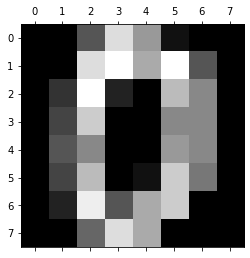

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

#Exactitud
Se puede calcular en fraccción (proporción) - con el parámetro *normalize* por defecto.

Se puede calcular en número de aciertos - con el parámetro *normalize = False*.

$$exactitud(y,\hat{y}) = \frac{1}{n} \sum_{i=0}^{n-1} 1(\hat{y_{i}}=y_{i}),$$

siendo $n$ el número total de ejemplos (instancias).

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = [0, 1, 2, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred)

accuracy_score(y_true, y_pred)

1.0

**Ejercicio Práctico**: Cuando hay datasets no balanceados, la exactitud no es una buena métrica, pues puede indicar falsamente un buen rendimiento. En estos casos es mejor usar la función [*balanced_accuracy_score*](https://scikit-learn.org/stable/modules/model_evaluation.html#balanced-accuracy-score). Usar el *dataset* iris, desbalancearlo a propósito y observar cómo cambia la exactitud. Después usar la función *balanced_accuracy_score* y reportar el cambio en la métrica.

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
data.target[[10, 25, 50]]

list(data.target_names)

['setosa', 'versicolor', 'virginica']

#Precisión

Podemos pensar en la precisión como la habilidad que tiene un clasificador de *NO ASIGNAR* falsos positivos (ejemplos clasificados como positivos que *en realidad* son negativos). En otras palabras, la métrica mide qué tan *preciso* es el clasificador para encontrar verdaderos positivos.

Matemáticamente la precisión se ve así:

$$P = \frac{T_p}{T_p + F_p},$$

con:

$T_p \Rightarrow$ Veraderos positivos

$F_p \Rightarrow$ Falsos positivos

Pregunta: ¿Cuál es el valor más alto posible? ¿El más bajo?

In [ ]:
from sklearn.metrics import precision_score
y_true = [0, 1, 0, 0, 1, 1]
y_pred = [0, 0, 1, 0, 0, 1]
precision_score(y_true, y_pred)

0.5

$$P = \frac{1}{1+1}=0.5$$

**Ejercicio Práctico**: Probar con diferentes opciones para el parámetro *average*. Observar los resultados. ¿Puedes intuir qué hace cada una de las opciones?

In [ ]:
from sklearn.metrics import precision_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
precision_score(y_true, y_pred, average='macro')

precision_score(y_true, y_pred, average='micro')

precision_score(y_true, y_pred, average='weighted')

precision_score(y_true, y_pred, average=None)

y_pred = [0, 0, 0, 0, 0, 0]
precision_score(y_true, y_pred, average=None)

precision_score(y_true, y_pred, average=None, zero_division=1)

#Recall

Intuitivamente esta métrica nos indica la habilidad del clasificador para encontrar *todos* los ejemplos verdaderos positivos.

Matemáticamente se ve así:

$$R = \frac{T_p}{T_p + F_n},$$

con:

$T_p \Rightarrow$ Verdaderos positivos

$F_n \Rightarrow$ Falsos negativos

Pregunta: ¿Cuál es el valor más alto posible? ¿El más bajo?

In [ ]:
from sklearn.metrics import recall_score
y_true = [0, 1, 1, 0, 1, 0]
y_pred = [0, 0, 1, 0, 0, 1]
recall_score(y_true, y_pred)

0.3333333333333333

$$R = \frac{2}{2 + 1}\approx 0.66$$

**Ejercicio Práctico**: Probar con diferentes opciones para el parámetro *average*. Observar los resultados. ¿Puedes intuir qué hace cada una de las opciones?

In [ ]:
from sklearn.metrics import recall_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
recall_score(y_true, y_pred, average='macro')

recall_score(y_true, y_pred, average='micro')

recall_score(y_true, y_pred, average='weighted')

recall_score(y_true, y_pred, average=None)

y_true = [0, 0, 0, 0, 0, 0]
recall_score(y_true, y_pred, average=None)

recall_score(y_true, y_pred, average=None, zero_division=1)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.5, 1. , 1. ])

#Puntuación F1

Interpretamos la puntuación F1 como el *pseudo*promedio ponderado (multiplicado por un factor) de la precisión y el *recall*.

Matemáticamente se ve así:

$$F1_{score}=2\cdot \frac{P\cdot R}{P + R}$$

Por lo tanto, un modelo obtiene buenos resultados en la puntuación F1 si los positivos predichos son realmente positivos (precisión) y no se equivoca con los positivos y los predice negativos (*recall*).

In [ ]:
from sklearn.metrics import f1_score
y_true = [0, 1, 0, 0, 1, 1]
y_pred = [0, 0, 1, 0, 0, 1]
f1_score(y_true, y_pred)

0.4

$$P = \frac{1}{1+1}=0.5$$

$$R = \frac{1}{1 + 2}\approx 0.33$$

$$F1 = 2\cdot \frac{0.5\cdot 0.\overline{33}}{0.5 + 0.\overline{33}}=0.4$$

**Ejercicio Práctico**: Probar con diferentes opciones para el parámetro *average*. Observar los resultados. ¿Puedes intuir qué hace cada una de las opciones?

In [ ]:
from sklearn.metrics import f1_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
f1_score(y_true, y_pred, average='macro')

f1_score(y_true, y_pred, average='micro')

f1_score(y_true, y_pred, average='weighted')

f1_score(y_true, y_pred, average=None)

y_true = [0, 0, 0, 0, 0, 0]
y_pred = [0, 0, 0, 0, 0, 0]
f1_score(y_true, y_pred, zero_division=1)

1.0

#**Selección de Características**

**Pregunta**: ¿Cómo puedo ajustar el modelo a los atributos más relevantes?, ¿esto me entregará una mejor evaluación?

1. Ingeniería de Características: Normalmente se aplica primero para generar características adicionales y luego se realiza la selección de características para eliminar características irrelevantes, redundantes o altamente correlacionadas. El proceso de seleccionar características sirve para reducir la dimensionalidad del problema de entrenamiento.

2.  La función de Sklearn *VarianceThreshold* es un enfoque básico simple para la selección de características.

3. Reducción de dimensiones: NCA (Neighborhood Components Analysis) basado en KNN (Ver curso: Cómo resolver problemas con aprendizaje supervisado) o PCA (Principal Component Analysis) que es el más popular (Ver curso: Cómo resolver problemas con aprendizaje no supervisado)

#Umbral de Varianza

**¿Qué hace la función?**

De forma predeterminada, elimina todas las características de varianza cero, es decir, las características que tienen el mismo valor en todas las muestras.

**¿Por qué es útil?**

Nos permite eliminar información redundante que no añade información nueva.

**Ejemplo**

Supón que tienes un conjunto de datos con características booleanas y quieres eliminar todas las características que son uno o cero (activadas o desactivadas) en más del 80% de las muestras. Las características booleanas son variables aleatorias de Bernoulli, y la varianza de tales variables está dada por:

$$VAR[X] = p(1-p) = 0.8(1-0.8)$$

In [ ]:
import numpy as np
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
X = np.array(X)
print(X)

[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 1]
 [0 1 0]
 [0 1 1]]


In [ ]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

El resultado es que se ha eliminado la primera columna, que tiene una probabilidad $p = 5/6 > 0.8$ de contener un cero.

#Lecturas recomendadas

**Inglés**
1.   [Various ways to evaluate a machine learning model’s performance](https://towardsdatascience.com/various-ways-to-evaluate-a-machine-learning-models-performance-230449055f15)
2.   [Metrics to Evaluate your Machine Learning Algorithm](https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234)

**Español**
1. [Ingeniería de características en ciencia de datos](https://docs.microsoft.com/es-es/azure/machine-learning/team-data-science-process/create-features)

2. [Cómo es trabajar de Científico de Datos: Ejemplo de un proyecto](https://machinelearningenespanol.com/2020/11/25/ejercicios-practicos-de-machine-learning/)

3. [Evaluación de la precisión del modelo](https://docs.aws.amazon.com/es_es/machine-learning/latest/dg/evaluating-model-accuracy.html)
